In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

a. Loading and pre-processing the data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Reshape data to add a channel dimension for grayscale images
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

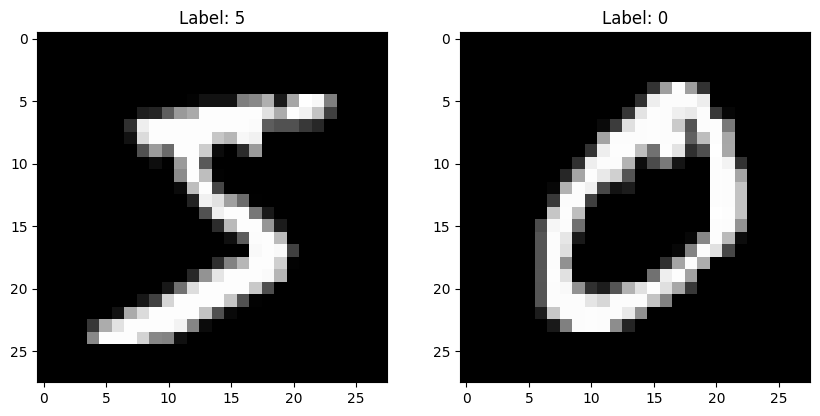

In [4]:
plt.figure(figsize=(10, 10))
for i in range(2):
    plt.subplot(2,2,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f'Label: {y_train[i]}')
plt.show()

b. Define Model's architecture

In [9]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

c. Training the model

In [11]:
train = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9131 - loss: 0.2805 - val_accuracy: 0.9815 - val_loss: 0.0572
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9874 - loss: 0.0432 - val_accuracy: 0.9894 - val_loss: 0.0327
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9910 - loss: 0.0279 - val_accuracy: 0.9892 - val_loss: 0.0302
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9933 - loss: 0.0208 - val_accuracy: 0.9909 - val_loss: 0.0285
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9956 - loss: 0.0146 - val_accuracy: 0.9898 - val_loss: 0.0346
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9965 - loss: 0.0110 - val_accuracy: 0.9910 - val_loss: 0.0349
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9971 - loss: 0.0082 - val_accuracy: 0.9912 - val_loss: 0.0291
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9982 - lo

d. Evaluating Model Performance

In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9867 - loss: 0.0553
Test Accuracy: 98.91%


Plotting the training loss and accuracy

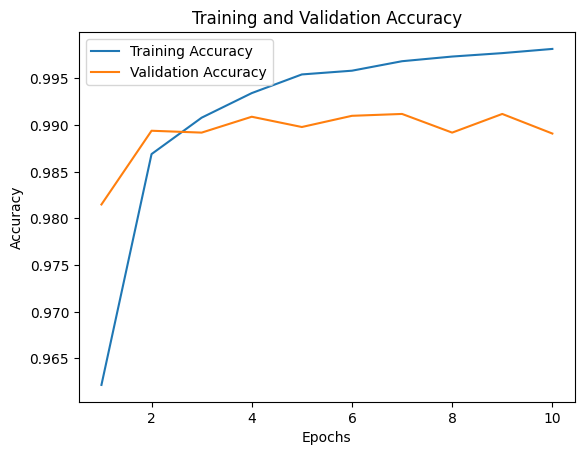

In [16]:
epochs = range(1, len(train.history['accuracy'])+1)
plt.plot(epochs, train.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()


Text(0.5, 1.0, 'Training and Validation Loss')

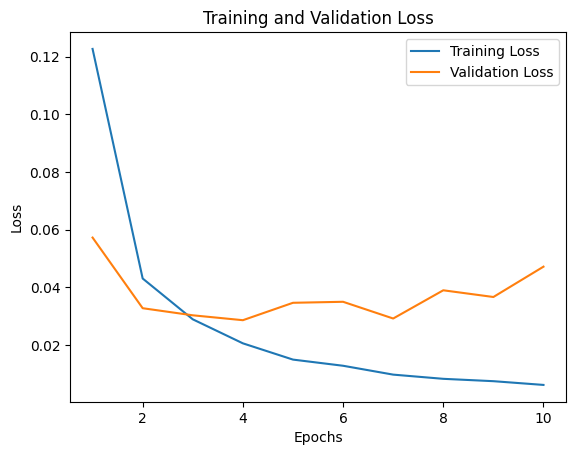

In [17]:
plt.plot(epochs, train.history['loss'], label='Training Loss')
plt.plot(epochs, train.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

Testing on a few images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


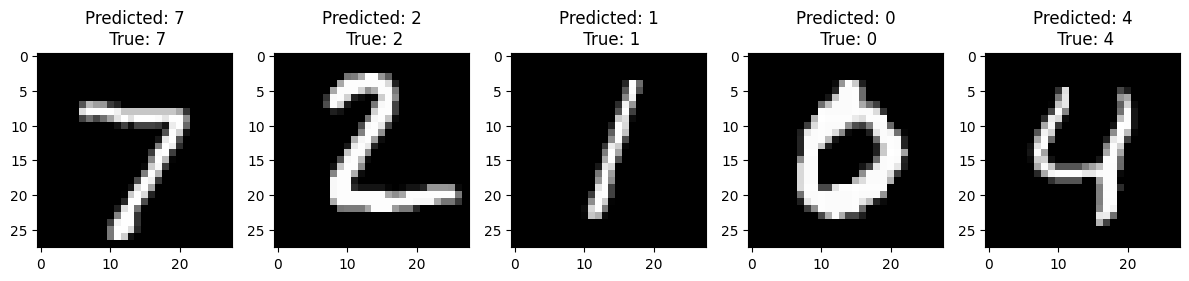

In [21]:
num = 5
plt.figure(figsize=(12, 8))
predictions = model.predict(x_test[:num])
for i in range(num):
    true_label = y_test[i]
    plt.subplot(1,num,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f'Predicted: {predictions[i].argmax()}\n True: {true_label}')

plt.tight_layout()
plt.show()
